# Goals of the exercise
This exercise includes the following focus points

- Introduction to the pandas library
- Exploratory data analysis of COVID-19 data
- Learn to join thematic with spatial data
- Plotting with spatial data
- Introduction to GeoPandas

The exercise requires two files that are provided to you "RKI_COVID19.csv" and "vg2500_bld.shp". Both files are located under the path "./coursematerial/GIS/GeoDataScience/Covid19Data" 

"RKI_COVID19.csv" is available under the following link. You can get the latest version of this file if you like to do some exploratory data analysis on your own with the daily updates of the Robert Koch Institut \
[data source](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0?orderBy=AnzahlGenesen&orderByAsc=false)

# Tasks
- Perform EDA on the actual Covid-19 virus infection data in the file "RKI_COVID19.csv"
- Display a map of the accumulative amount of infection in each of the German states

# Getting to know the data
In this exercise, we will be using pandas. Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. To load the pandas package and start working with it, import the package. The community agreed on an alias for pandas is pd, so loading pandas as pd is assumed standard practice

In [15]:
import pandas as pd
import os


Let us load the data in the file "RKI_COVID19.csv" into a DataFrame. A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating-point values, categorical data, and more) in columns. It is similar to a spreadsheet, a SQL table, or the data frame in R language.

In [18]:
df_covid_data = pd.read_csv('RKI_COVID19.csv', parse_dates=True)

## Basic information

We can invoke the method info() to get an overall technical summary of our data such as the number of rows, column types, and memory usage

In [19]:
df_covid_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832505 entries, 0 to 1832504
Data columns (total 18 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ObjectId              int64 
 1   IdBundesland          int64 
 2   Bundesland            object
 3   Landkreis             object
 4   Altersgruppe          object
 5   Geschlecht            object
 6   AnzahlFall            int64 
 7   AnzahlTodesfall       int64 
 8   Meldedatum            object
 9   IdLandkreis           int64 
 10  Datenstand            object
 11  NeuerFall             int64 
 12  NeuerTodesfall        int64 
 13  Refdatum              object
 14  NeuGenesen            int64 
 15  AnzahlGenesen         int64 
 16  IstErkrankungsbeginn  int64 
 17  Altersgruppe2         object
dtypes: int64(10), object(8)
memory usage: 251.7+ MB


This a translation of the column names that we will be using in the exercise

| Column | Translation|
| --- | --- |
|IdBundesland     | The id of the German state |
|Bundesland       | The name of the German state   |
|Altersgruppe     | Age group  |
|Geschlecht       | Sex |
|AnzahlFall       | Number of infections  |
|AnzahlTodesfall  | Number of deaths  |
|Meldedatum       | Date of registration  |

Let us check specifically stored columns in the table and their types. We notice that the "Meldedatum" is with the type object. This is not suitable to perform queries that have are limited by date or time values

In [20]:
 df_covid_data.dtypes

ObjectId                 int64
IdBundesland             int64
Bundesland              object
Landkreis               object
Altersgruppe            object
Geschlecht              object
AnzahlFall               int64
AnzahlTodesfall          int64
Meldedatum              object
IdLandkreis              int64
Datenstand              object
NeuerFall                int64
NeuerTodesfall           int64
Refdatum                object
NeuGenesen               int64
AnzahlGenesen            int64
IstErkrankungsbeginn     int64
Altersgruppe2           object
dtype: object

In [21]:
df_covid_data['Meldedatum'] = pd.to_datetime(df_covid_data['Meldedatum'])


In [22]:
df_covid_data.dtypes

ObjectId                              int64
IdBundesland                          int64
Bundesland                           object
Landkreis                            object
Altersgruppe                         object
Geschlecht                           object
AnzahlFall                            int64
AnzahlTodesfall                       int64
Meldedatum              datetime64[ns, UTC]
IdLandkreis                           int64
Datenstand                           object
NeuerFall                             int64
NeuerTodesfall                        int64
Refdatum                             object
NeuGenesen                            int64
AnzahlGenesen                         int64
IstErkrankungsbeginn                  int64
Altersgruppe2                        object
dtype: object

In [23]:
df_covid_data.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

The table has 18 columns, each of them with a column label. The column labels are respectively 'ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'. You can think of each  column in a DataFrame is a Series.

## Selection

Let us check the content of the DataFrame by executing the method head(). This method prints the top five rows stored in the DataFrame. We will use DataFrame and table interchangeably from now on.

In [24]:
df_covid_data.head()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00+00,0,1,0,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-10-29 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00+00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-03 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-20 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-11-23 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00+00,0,1,1,Nicht übermittelt


Let us examine the first row of the table. This is an example of one data entry

In [25]:
df_covid_data.loc[0]

ObjectId                                        1
IdBundesland                                    1
Bundesland                     Schleswig-Holstein
Landkreis                            SK Flensburg
Altersgruppe                              A00-A04
Geschlecht                                      M
AnzahlFall                                      1
AnzahlTodesfall                                 0
Meldedatum              2020-09-30 00:00:00+00:00
IdLandkreis                                  1001
Datenstand                  03.05.2021, 00:00 Uhr
NeuerFall                                       0
NeuerTodesfall                                 -9
Refdatum                   2020/09/30 00:00:00+00
NeuGenesen                                      0
AnzahlGenesen                                   1
IstErkrankungsbeginn                            0
Altersgruppe2                   Nicht übermittelt
Name: 0, dtype: object

Let us check to see the information that is stored in the columns "Bundesland" and "AnzahlFall". We can have a subset by doing the following projections

In [26]:
df_covid_data["Bundesland"]

0          Schleswig-Holstein
1          Schleswig-Holstein
2          Schleswig-Holstein
3          Schleswig-Holstein
4          Schleswig-Holstein
                  ...        
1832500             Thüringen
1832501             Thüringen
1832502             Thüringen
1832503             Thüringen
1832504             Thüringen
Name: Bundesland, Length: 1832505, dtype: object

Note that a pandas series has no column labels, as it is just a single column of a DataFrame. A Series does have row labels.

In [27]:
df_covid_data["AnzahlFall"]

0          1
1          1
2          1
3          1
4          1
          ..
1832500    1
1832501    1
1832502    6
1832503    1
1832504    1
Name: AnzahlFall, Length: 1832505, dtype: int64

We can use some aggregation functionality and calculate the number of infections in Germany. For example the total sum of the column "AnzahlFall"

In [28]:
df_covid_data["AnzahlFall"].sum()

3425864

We can check the unique names of German states as follows. Note that the original shape of the column corresponds to the original shape of the table

In [29]:
df_covid_data["Bundesland"].shape

(1832505,)

In [30]:
df_covid_data["Bundesland"].unique()

array(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen',
       'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz',
       'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen'],
      dtype=object)

## Filter specific rows
Let us check the number of Males that are infected and compare it to the number of females

In [31]:
df_covid_data["Geschlecht"].unique()

array(['M', 'W', 'unbekannt'], dtype=object)

Note that we can perform this logical comparison on all the rows to check if the sex of the patient is male or female. The result can be used as an index to select from the table itself. Only the rows with True values will be returned.

In [32]:
df_covid_data["Geschlecht"]=="M"

0           True
1           True
2           True
3           True
4           True
           ...  
1832500    False
1832501    False
1832502    False
1832503    False
1832504    False
Name: Geschlecht, Length: 1832505, dtype: bool

In [33]:
filter_males=df_covid_data["Geschlecht"]=="M"

In [34]:
df_covid_data["Geschlecht"][filter_males].count()

884915

In [35]:
filter_females = df_covid_data["Geschlecht"] == "W"
df_covid_data["Geschlecht"][filter_females].count()


928546

In [36]:
df_covid_data["Geschlecht"][df_covid_data["Geschlecht"] == "unbekannt"].count()

19044

Let us check if the total number of the subsets corresponds to the total number of rows

In [38]:
df_covid_data["Geschlecht"].count()


1832505

We notice that summing up the three group count matches the total number of rows as we expected

In [40]:
df_covid_data["Geschlecht"][filter_females].count() + df_covid_data["Geschlecht"][filter_males].count() +df_covid_data["Geschlecht"][df_covid_data["Geschlecht"] == "unbekannt"].count()


1832505

## Aggregation
In order to derive more insightful information let us group our data based on spatial information that we have and currently is the name of the state. groupby() operation is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes.


In [41]:
df_grouped_by_state = df_covid_data.groupby("Bundesland")
df_grouped_by_state


Notice the return type of a groupby operation This can be used to group large amounts of data and compute operations on these groups. Let us perform some exploration on this new data arrangement

In [42]:
df_grouped_by_state["AnzahlFall"].sum()


Bundesland
Baden-Württemberg         450554
Bayern                    599778
Berlin                    169012
Brandenburg               102825
Bremen                     25463
Hamburg                    72380
Hessen                    265595
Mecklenburg-Vorpommern     40593
Niedersachsen             240354
Nordrhein-Westfalen       746229
Rheinland-Pfalz           141446
Saarland                   37711
Sachsen                   265330
Sachsen-Anhalt             91611
Schleswig-Holstein         59142
Thüringen                 117841
Name: AnzahlFall, dtype: int64

Notice that the type of this operation is a panda series. Therefore, we can apply multiple operations in sequence

In [43]:
type(df_grouped_by_state["AnzahlFall"].sum())


pandas.core.series.Series

Let us check the German state with the largest amount of total infections. Notice that the name of the state is now used as an index

In [44]:
df_grouped_by_state["AnzahlFall"].sum().idxmax()

'Nordrhein-Westfalen'

Let us get the value of the number of the maximum infection in the state of Nordrhein-Westfalen

In [45]:
df_grouped_by_state["AnzahlFall"].sum().loc["Nordrhein-Westfalen"]


746229

Let us get the mean and median of the number of infections per state

In [46]:
df_grouped_by_state["AnzahlFall"].sum().mean()


214116.5

In [47]:
df_grouped_by_state["AnzahlFall"].sum().median()


129643.5

We can apply several aggregation functions to this data frame individually. However, pandas provide a function that enables us to retrieve a set of statistical values of the series that we are interested in

In [48]:
df_grouped_by_state["AnzahlFall"].sum().describe()


count        16.000000
mean     214116.500000
std      212704.180513
min       25463.000000
25%       69070.500000
50%      129643.500000
75%      265396.250000
max      746229.000000
Name: AnzahlFall, dtype: float64

## Plotting

To visually compare the values of infections, we can plot the values in several ways. For example, we can

<AxesSubplot:xlabel='Bundesland'>

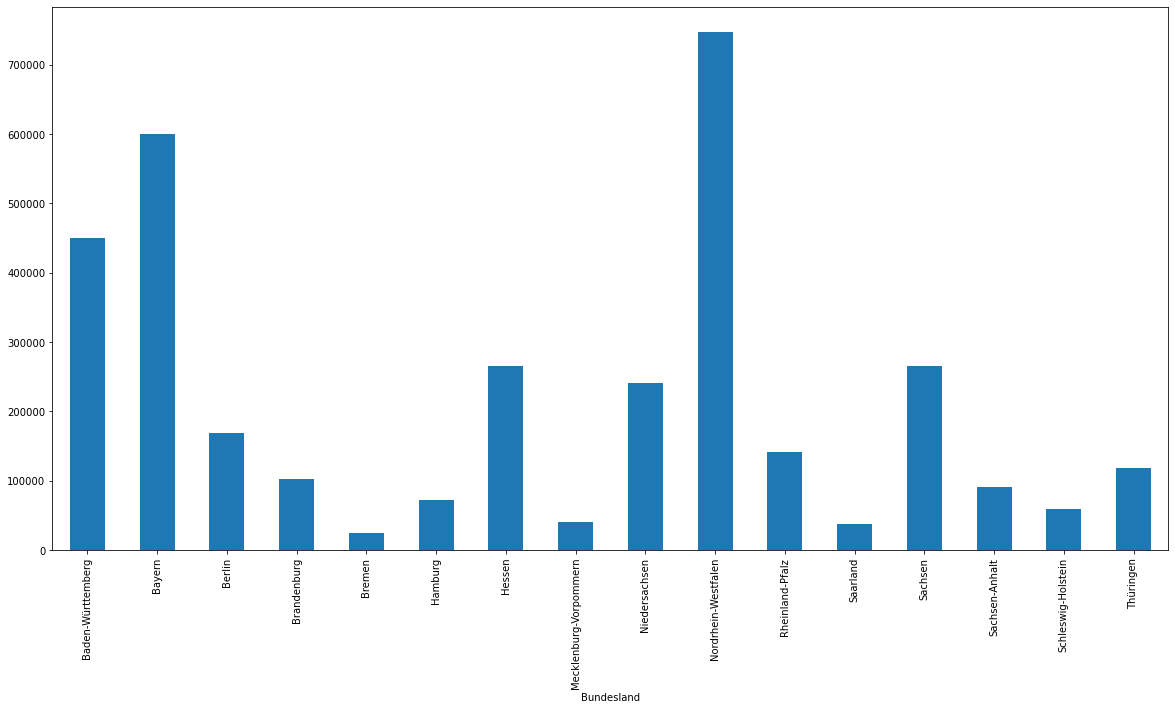

In [49]:
df_grouped_by_state["AnzahlFall"].sum().plot.bar(figsize=(20,10))

Let us add to our plot two lines. One representing the median of the infection number and the other representing the average

Let us import the MatplotLib library and add the two lines to our plot

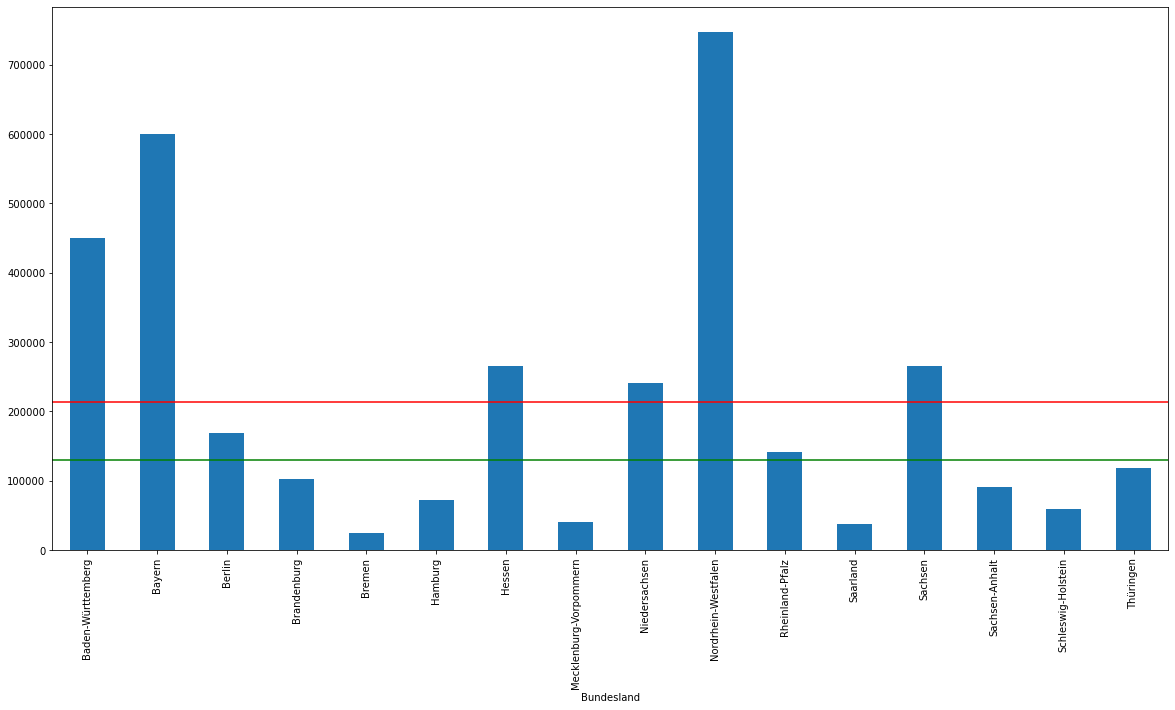

A Box Plot is a more informative plot that depicts much statistical information. A Box Plot is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages

The box plot consists of the following things:
- Minimum
- First Quartile or 25%
- Median (Second Quartile) or 50%
- Third Quartile or 75%
- Maximum
- Outliers represented as scattered points

We can see that the values at the second quartile are located in a small range whereas the value at the third quartile is located in a larger range

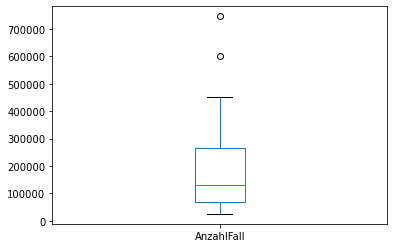

The state of Nordrhein-Westfalen seems to have a high infection rate therefore let us plot the development of infection numbers over time. Let us change the main index to the time/date column of the registration time

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
Meldedatum,,,,,,,,,,,,,,,,,
2021-04-05 00:00:00+00:00,222502,5,Nordrhein-Westfalen,SK Düsseldorf,A00-A04,W,2,0,5111,"03.05.2021, 00:00 Uhr",0,-9,2021/04/01 00:00:00+00,0,2,1,Nicht übermittelt
2021-04-06 00:00:00+00:00,222504,5,Nordrhein-Westfalen,SK Düsseldorf,A00-A04,W,1,0,5111,"03.05.2021, 00:00 Uhr",0,-9,2021/03/30 00:00:00+00,0,1,1,Nicht übermittelt
2021-04-06 00:00:00+00:00,222506,5,Nordrhein-Westfalen,SK Düsseldorf,A00-A04,W,3,0,5111,"03.05.2021, 00:00 Uhr",0,-9,2021/04/03 00:00:00+00,0,3,1,Nicht übermittelt
2021-04-07 00:00:00+00:00,222508,5,Nordrhein-Westfalen,SK Düsseldorf,A00-A04,W,1,0,5111,"03.05.2021, 00:00 Uhr",0,-9,2021/04/03 00:00:00+00,0,1,1,Nicht übermittelt
2021-04-08 00:00:00+00:00,222510,5,Nordrhein-Westfalen,SK Düsseldorf,A00-A04,W,1,0,5111,"03.05.2021, 00:00 Uhr",0,-9,2021/03/30 00:00:00+00,0,1,1,Nicht übermittelt


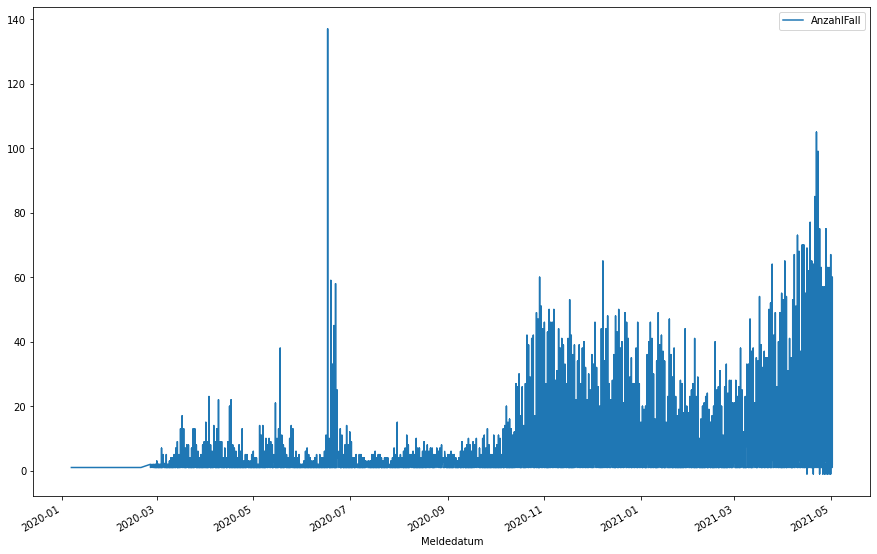

Let us calculate the weekly sum of the infections per week

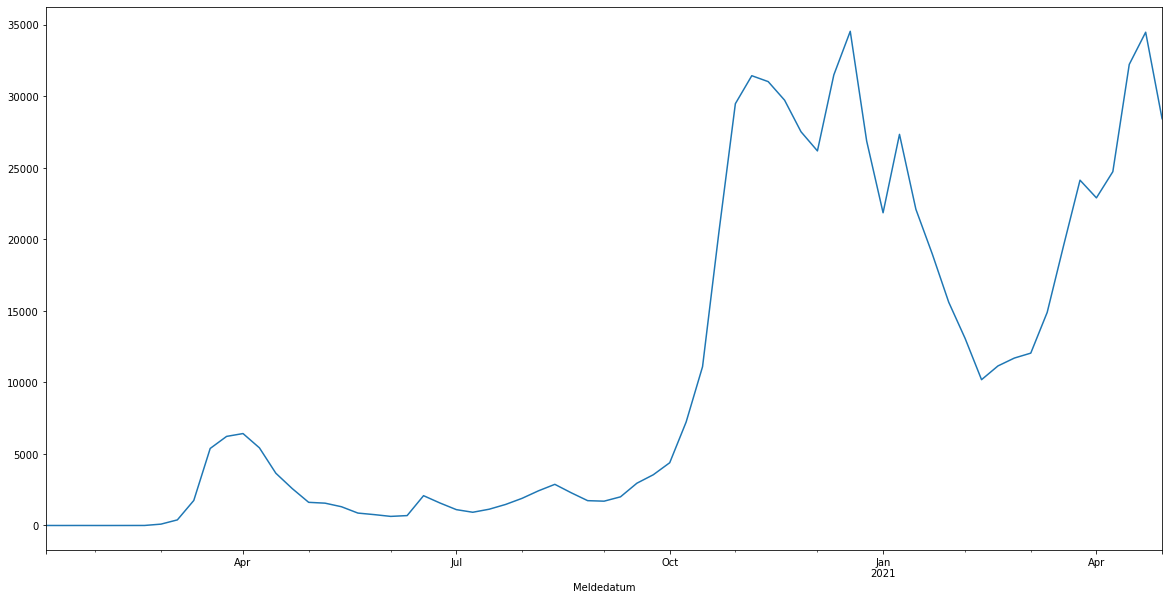

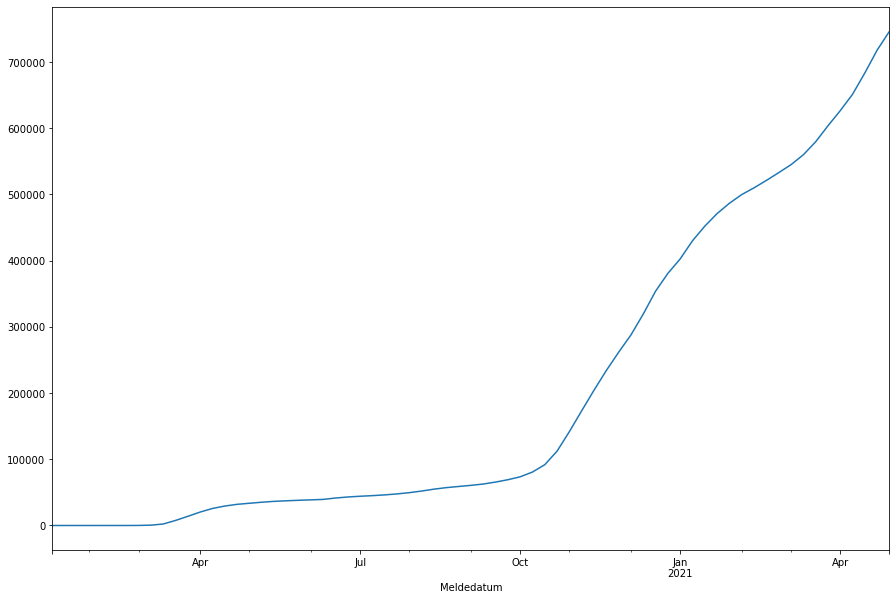

Let us compare the plots with the states with the lowest number of cases

'Bremen'

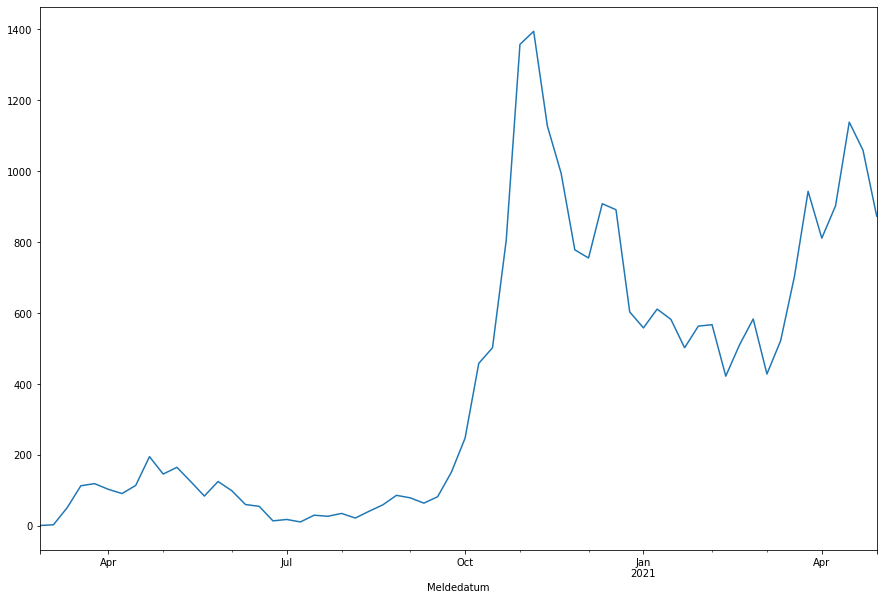

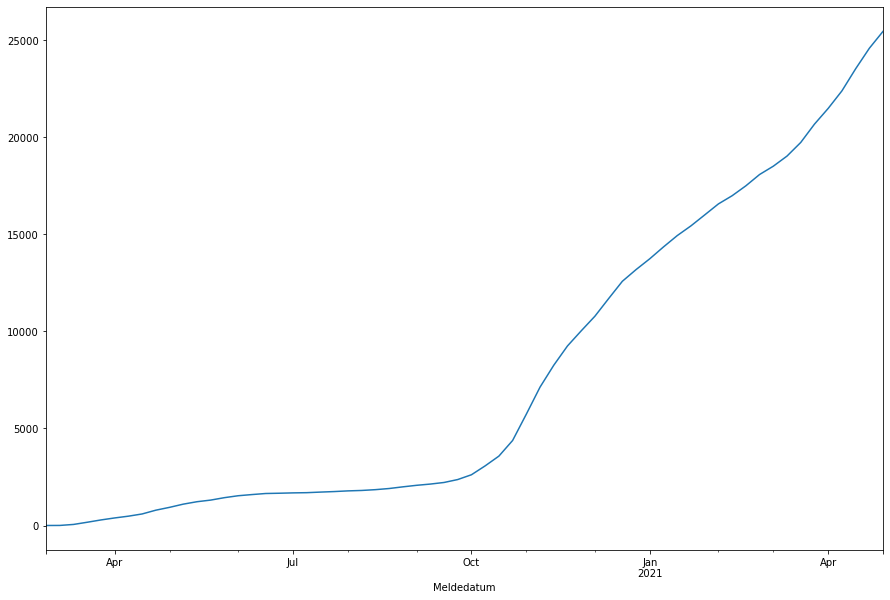

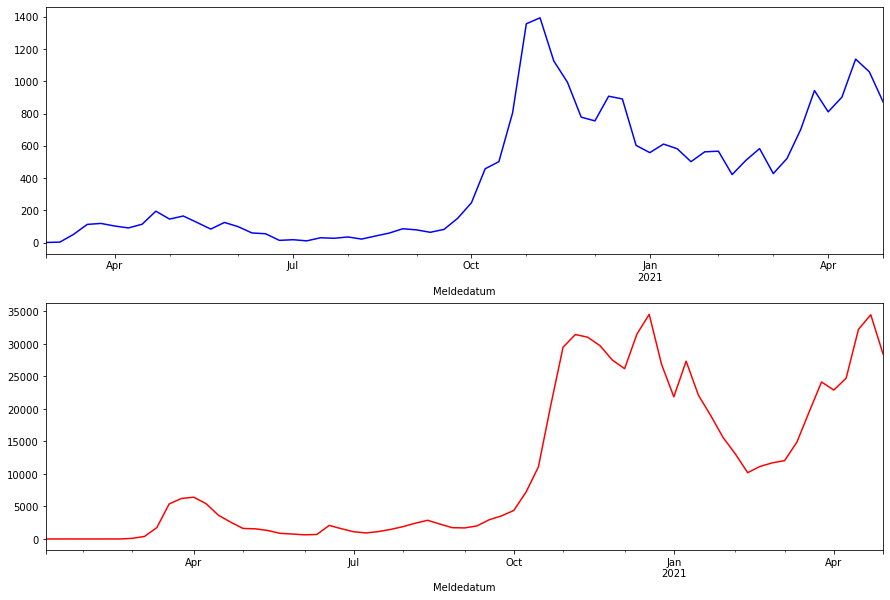

## Advanced queries

Let us select the data that is after a certain date "2021/04/05"

0          False
1          False
2          False
3          False
4          False
           ...  
1832500     True
1832501     True
1832502     True
1832503     True
1832504     True
Name: Meldedatum, Length: 1832505, dtype: bool

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
34,35,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2021-04-06 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/01 00:00:00+00,0,1,1,Nicht übermittelt
35,36,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2021-04-08 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/07 00:00:00+00,0,1,1,Nicht übermittelt
36,37,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,2,0,2021-04-09 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/07 00:00:00+00,0,2,1,Nicht übermittelt
37,38,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2021-04-15 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/15 00:00:00+00,0,1,0,Nicht übermittelt
38,39,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2021-04-17 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/17 00:00:00+00,0,1,0,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832500,1832501,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021-04-27 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/27 00:00:00+00,-9,0,0,Nicht übermittelt
1832501,1832502,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021-04-28 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/28 00:00:00+00,-9,0,0,Nicht übermittelt
1832502,1832503,16,Thüringen,LK Altenburger Land,A80+,W,6,0,2021-04-29 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/29 00:00:00+00,-9,0,0,Nicht übermittelt
1832503,1832504,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021-04-30 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/30 00:00:00+00,-9,0,0,Nicht übermittelt


let us select the infections that happened in the first week of April. We can combine filters with the logical and operator &

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
34,35,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2021-04-06 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/01 00:00:00+00,0,1,1,Nicht übermittelt
35,36,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2021-04-08 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/07 00:00:00+00,0,1,1,Nicht übermittelt
36,37,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,2,0,2021-04-09 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/07 00:00:00+00,0,2,1,Nicht übermittelt
69,70,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2021-04-06 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/06 00:00:00+00,0,1,0,Nicht übermittelt
70,71,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2021-04-08 00:00:00+00:00,1001,"03.05.2021, 00:00 Uhr",0,-9,2021/04/07 00:00:00+00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832315,1832316,16,Thüringen,LK Altenburger Land,A60-A79,M,4,0,2021-04-08 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/08 00:00:00+00,-9,0,0,Nicht übermittelt
1832316,1832317,16,Thüringen,LK Altenburger Land,A60-A79,M,6,0,2021-04-09 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/09 00:00:00+00,-9,0,0,Nicht übermittelt
1832317,1832318,16,Thüringen,LK Altenburger Land,A60-A79,M,1,0,2021-04-10 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/10 00:00:00+00,-9,0,0,Nicht übermittelt
1832318,1832319,16,Thüringen,LK Altenburger Land,A60-A79,M,3,0,2021-04-12 00:00:00+00:00,16077,"03.05.2021, 00:00 Uhr",0,-9,2021/04/12 00:00:00+00,-9,0,0,Nicht übermittelt


# Combination with spatial data

We have the Shapefile "vg2500_bld.shp" that includes the German states. We can use GeoPands to read and combine the previous table with the state borders. GeoPandas is an open-source project to make working with geospatial data in python easier. GeoPandas extends the data types used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting

We can use the same functionality that is provided by the pandas DataFrames. For example, we can print the first five records by using the operation head()

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."


Note the type of the column geometry

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USE         16 non-null     int64   
 1   RS          16 non-null     object  
 2   RS_ALT      16 non-null     object  
 3   GEN         16 non-null     object  
 4   SHAPE_LENG  16 non-null     float64 
 5   SHAPE_AREA  16 non-null     float64 
 6   geometry    16 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 1.0+ KB


Additionally, the plot() operation provides a map of the data by default when executed by a GeoDataFrame

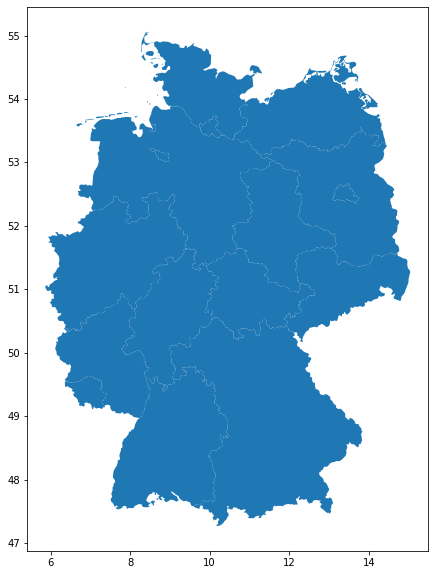

Let us add the labels to each state in our map. For that, we need to calculate the coordinates where the labels will be placed

0     MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...
1     MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...
2     MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...
3     POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...
4     POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...
5     POLYGON ((7.84657 50.87861, 7.85901 50.87733, ...
6     MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7...
7     POLYGON ((10.47207 47.56964, 10.47319 47.57081...
8     POLYGON ((7.06853 49.62349, 7.08023 49.61196, ...
9     POLYGON ((13.61192 52.54332, 13.62461 52.53797...
10    POLYGON ((13.87357 53.47515, 13.91610 53.45652...
11    MULTIPOLYGON (((12.66717 54.44292, 12.67209 54...
12    POLYGON ((12.90084 51.64699, 12.91309 51.64488...
13    POLYGON ((11.63624 53.00680, 11.64091 53.00601...
14    POLYGON ((10.86498 51.62927, 10.89515 51.61114...
15    MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...
Name: geometry, dtype: geometry

We can use the representative_point() function returns a GeoSeries of (cheaply computed) points that are guaranteed to be within each geometry. Let us test this function on the first entry

We can list the coordinates of the geometry and we check that they are suitable to use as an anchor point for the labels 

[(9.943770215200566, 53.570718592428264)]

(9.943770215200566, 53.570718592428264)

However, we want to calculate this for all the records in the GeodataFrame. Therefore, we can use the apply() function. Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument

0     (9.943770215200566, 53.570718592428264)
1      (8.841729252945912, 52.59941555036723)
2      (8.805685770386582, 53.12013691591372)
3      (7.580030290768905, 51.42103088597463)
4     (9.018089411033944, 50.525534817334524)
5      (7.275619014633683, 49.95306995636189)
6      (9.073168991682733, 48.66291105358423)
7     (12.048865879128916, 48.91866134001624)
8     (6.958900077136379, 49.377642596717635)
9      (13.39337765369174, 52.50395948433996)
10    (14.157702698238655, 52.46037661951791)
11    (12.34856082691502, 53.798965642708225)
12    (13.521552924153259, 50.92830455681877)
13    (11.558993866944512, 51.99056280128909)
14    (11.324424060356474, 50.92646399095025)
15     (9.957114418937644, 54.20896049353601)
Name: geometry, dtype: object

However, we are using the get_coordinates() function only once. Python allows using lambda functions which are small anonymous functions. A lambda function can take any number of arguments, but can only have one expression

0     (9.943770215200566, 53.570718592428264)
1      (8.841729252945912, 52.59941555036723)
2      (8.805685770386582, 53.12013691591372)
3      (7.580030290768905, 51.42103088597463)
4     (9.018089411033944, 50.525534817334524)
5      (7.275619014633683, 49.95306995636189)
6      (9.073168991682733, 48.66291105358423)
7     (12.048865879128916, 48.91866134001624)
8     (6.958900077136379, 49.377642596717635)
9      (13.39337765369174, 52.50395948433996)
10    (14.157702698238655, 52.46037661951791)
11    (12.34856082691502, 53.798965642708225)
12    (13.521552924153259, 50.92830455681877)
13    (11.558993866944512, 51.99056280128909)
14    (11.324424060356474, 50.92646399095025)
15     (9.957114418937644, 54.20896049353601)
Name: geometry, dtype: object

Let us put everything together

([], <a list of 0 Text major ticklabel objects>)

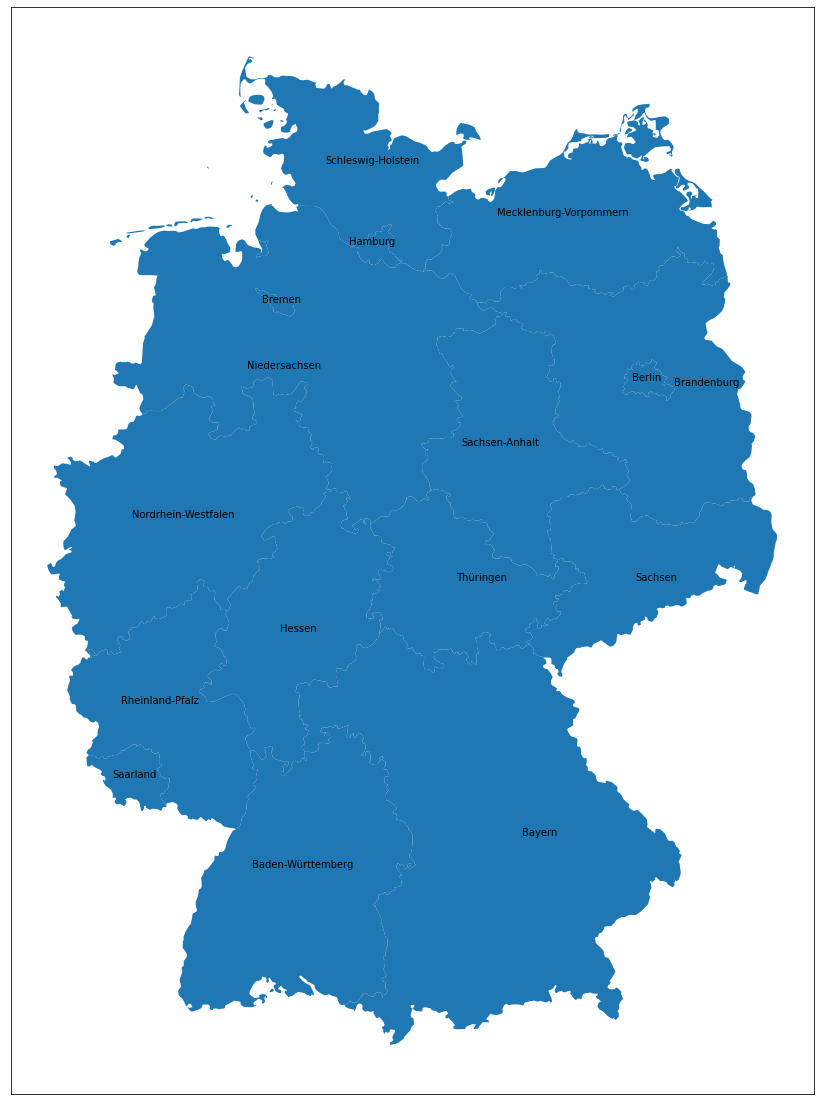

Remember that we have the df_grouped_by_state DataFrame. We want to combine both data frames to show the data on the map. Let us aggregate some information

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,AnzahlFall,AnzahlTodesfall
Bundesland,,
Baden-Württemberg,450554,9388
Bayern,599778,14203
Berlin,169012,3215
Brandenburg,102825,3575
Bremen,25463,454
Hamburg,72380,1503
Hessen,265595,6904
Mecklenburg-Vorpommern,40593,1000
Niedersachsen,240354,5324


We want to join the Covid-19 aggregated data with the states Shapefile. We notice that the GEN column in the gdf_german_states GeoDataFrame contains the same data as the main index in the df_states_grouped DataFrame. Therefore, we can join both based on this column

,USE,RS,RS_ALT,SHAPE_LENG,SHAPE_AREA,geometry,coords,AnzahlFall,AnzahlTodesfall
GEN,,,,,,,,,
Hamburg,2,02,020000000000,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...","(9.943770215200566, 53.570718592428264)",72380,1503
Niedersachsen,2,03,030000000000,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...","(8.841729252945912, 52.59941555036723)",240354,5324
Bremen,2,04,040000000000,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...","(8.805685770386582, 53.12013691591372)",25463,454
Nordrhein-Westfalen,2,05,050000000000,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...","(7.580030290768905, 51.42103088597463)",746229,15593
Hessen,2,06,060000000000,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...","(9.018089411033944, 50.525534817334524)",265595,6904
Rheinland-Pfalz,2,07,070000000000,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ...","(7.275619014633683, 49.95306995636189)",141446,3562
Baden-Württemberg,2,08,080000000000,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7...","(9.073168991682733, 48.66291105358423)",450554,9388
Bayern,2,09,090000000000,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081...","(12.048865879128916, 48.91866134001624)",599778,14203
Saarland,2,10,100000000000,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ...","(6.958900077136379, 49.377642596717635)",37711,961


We want to access the state names to label our map. Therefore, let us reset the index of the GeoDataFrame

,GEN,USE,RS,RS_ALT,SHAPE_LENG,SHAPE_AREA,geometry,coords,AnzahlFall,AnzahlTodesfall
0,Hamburg,2,02,020000000000,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...","(9.943770215200566, 53.570718592428264)",72380,1503
1,Niedersachsen,2,03,030000000000,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...","(8.841729252945912, 52.59941555036723)",240354,5324
2,Bremen,2,04,040000000000,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...","(8.805685770386582, 53.12013691591372)",25463,454
3,Nordrhein-Westfalen,2,05,050000000000,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...","(7.580030290768905, 51.42103088597463)",746229,15593
4,Hessen,2,06,060000000000,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...","(9.018089411033944, 50.525534817334524)",265595,6904


We can plot the values in the choropleth map. A choropleth map is a type of thematic map in which a set of pre-defined areas is colored or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area. In this case, we are using the number of infections as our variable.

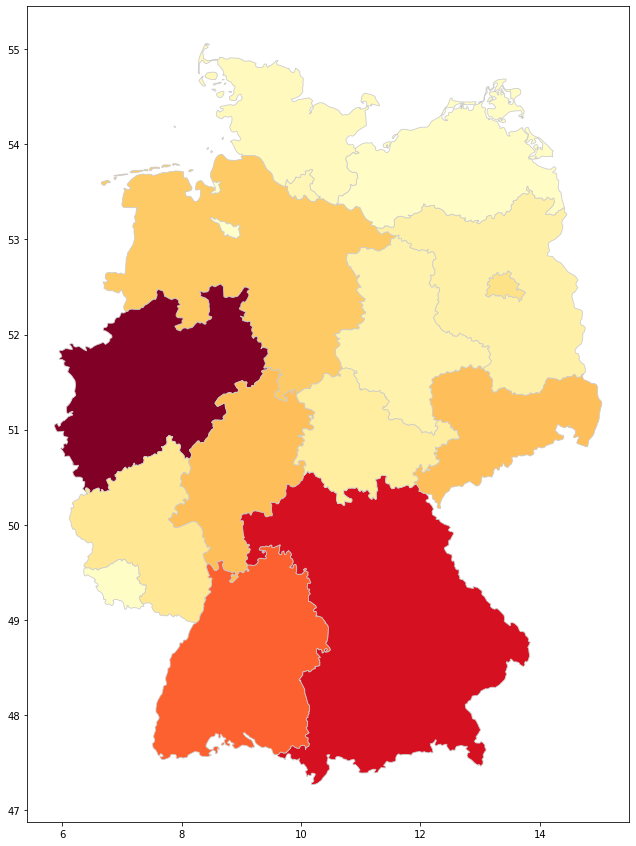

Let us add the labels to our map

([], <a list of 0 Text major ticklabel objects>)

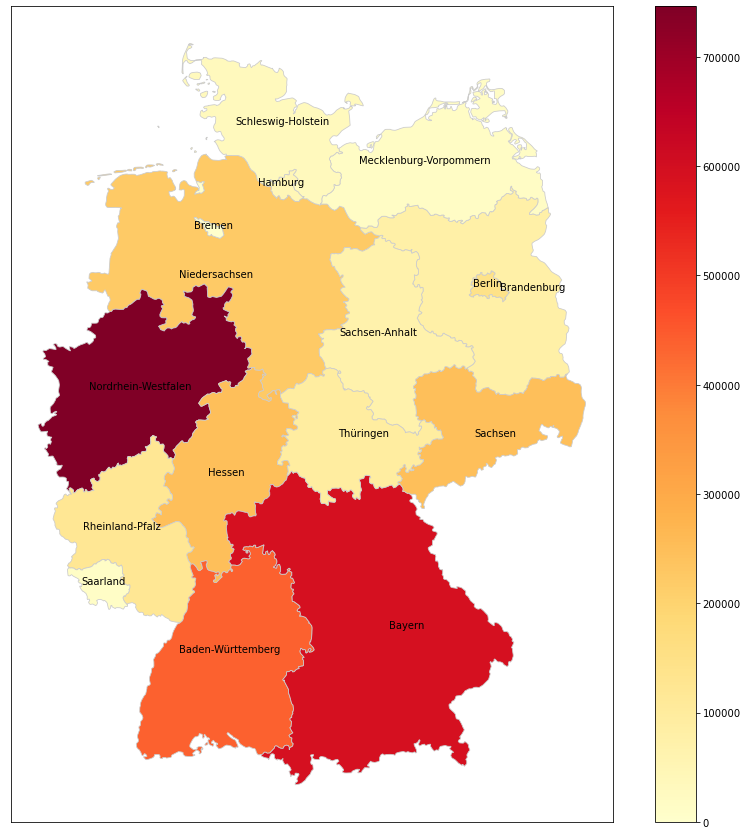

# Loading data from the Internet
You can also access the data directly using a data URL. This will allow for an update of your data analysis in real-time.

,attributes.IdBundesland,attributes.Bundesland,attributes.Landkreis,attributes.Altersgruppe,attributes.Geschlecht,attributes.AnzahlFall,attributes.AnzahlTodesfall,attributes.ObjectId,attributes.Meldedatum,attributes.IdLandkreis,attributes.Datenstand,attributes.NeuerFall,attributes.NeuerTodesfall,attributes.Refdatum,attributes.NeuGenesen,attributes.AnzahlGenesen,attributes.IstErkrankungsbeginn,attributes.Altersgruppe2
0,5,Nordrhein-Westfalen,SK Köln,A60-A79,M,1,0,345730,1578355200000,05315,"06.05.2021, 00:00 Uhr",0,-9,1604966400000,0,1,1,Nicht übermittelt
1,11,Berlin,SK Berlin Neukölln,A15-A34,W,1,0,1497806,1579392000000,11008,"06.05.2021, 00:00 Uhr",0,-9,1579392000000,0,1,0,Nicht übermittelt
2,10,Saarland,LK Stadtverband Saarbrücken,A80+,M,1,0,1424947,1579737600000,10041,"06.05.2021, 00:00 Uhr",0,-9,1579737600000,0,1,0,Nicht übermittelt
3,5,Nordrhein-Westfalen,SK Köln,A35-A59,W,1,0,343250,1579910400000,05315,"06.05.2021, 00:00 Uhr",0,-9,1579910400000,0,1,0,Nicht übermittelt
4,9,Bayern,LK Landsberg a.Lech,A15-A34,M,1,0,1144440,1580169600000,09181,"06.05.2021, 00:00 Uhr",0,-9,1579737600000,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8,Baden-Württemberg,LK Esslingen,A15-A34,W,1,0,844508,1584144000000,08116,"06.05.2021, 00:00 Uhr",0,-9,1583971200000,0,1,1,Nicht übermittelt
4996,8,Baden-Württemberg,LK Esslingen,A35-A59,M,1,0,845797,1584144000000,08116,"06.05.2021, 00:00 Uhr",0,-9,1583625600000,0,1,1,Nicht übermittelt
4997,8,Baden-Württemberg,LK Esslingen,A35-A59,M,1,0,845798,1584144000000,08116,"06.05.2021, 00:00 Uhr",0,-9,1583798400000,0,1,1,Nicht übermittelt
4998,8,Baden-Württemberg,LK Esslingen,A35-A59,M,6,0,845799,1584144000000,08116,"06.05.2021, 00:00 Uhr",0,-9,1583884800000,0,6,1,Nicht übermittelt
